In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib
from astropy.table import Table

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

# The Goal:
Remake this plot that Schmidt and I made one evening, many years ago.... but with MORE data!

Then, have a tool to compute metallicity for "all" Gaia stars!

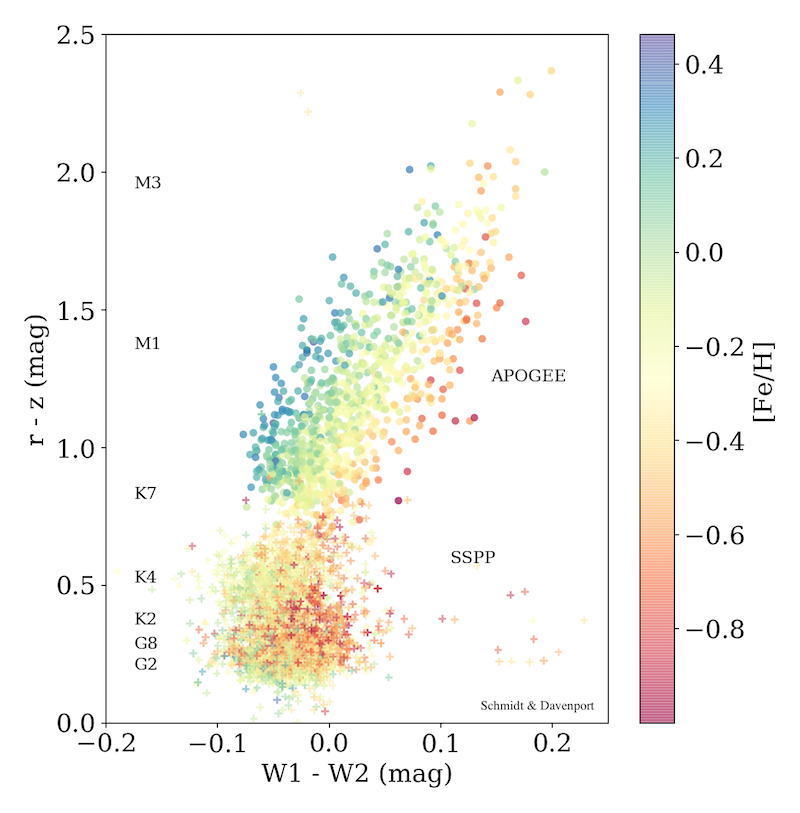

In [3]:
from IPython.display import Image
Image(filename='./w1w2_rz_feh.png', width=500) 

## Step 1: X-match
We need to combine the SSPP and APOGEE properties tables with:
- Gaia DR2
- AllWISE

Hopefully both tables have SDSS colors.......

**Q:** Can I combine both `(ra,dec)` lists and do 1 X-match for both catalogs?

### SDSS first

In [158]:
# #umm... are these dwarfs? Nothing with logg>=4... boo
# da = np.where((apog['LOGG'] >= 3.3) & (apog['FE_H'] > -5))[0]

# plt.scatter(apog['TEFF'][da], apog['J'][da] - apog['WISE_4_5'][da], 
#             c=apog['FE_H'][da], s=5, alpha=0.5)
# plt.ylim(0,1.5)
# plt.xlim(5700,4000)
# plt.ylabel('J - W2')
# plt.xlabel('Teff')
# cb=plt.colorbar()
# cb.set_label('[Fe/H]')

In [4]:
# sdss = Table.read('/Users/james/Desktop/gaia_tmp/ssppOut-dr12.fits', format='fits')

(6, -2)

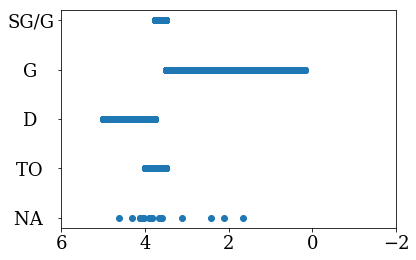

In [6]:
# plt.scatter(sdss['LOGG_ADOP'], sdss['L_CLASS'])
# plt.xlim(6,-2)

In [85]:
# xyok = np.where((sdss['RA'] >= 0) & (sdss['RA'] <= 360) & 
#                 (sdss['DEC'] >= -90) & (sdss['DEC'] <= 90))[0]
# # df_out = pd.DataFrame(data={'ra':sdss['RA'][xyok], 'dec':sdss['DEC'][xyok]})
# # df_out.to_csv('sspp_toX.csv')

In [11]:
# Xgaia = pd.read_csv('/Users/james/Desktop/gaia_tmp/Xgaia.csv')
# Xwise = pd.read_csv('/Users/james/Desktop/gaia_tmp/Xwise.csv')

In [100]:
# df = sdss[xyok].to_pandas()
# tmp_data = pd.merge(Xgaia, Xwise, left_on=u'id', right_on=u'id')
# data = pd.merge(df, tmp_data, how='inner', left_on=np.arange(len(df)), right_on=u'id')

Text(0.5,1,'SSPP sources')

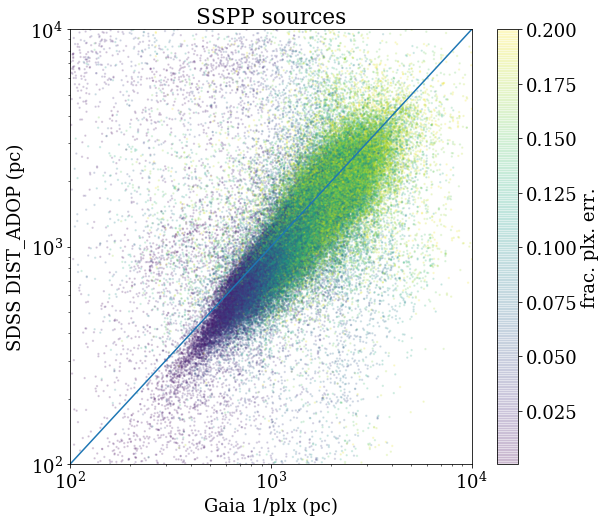

In [112]:
# ok = np.where((data[u'parallax_error']/data[u'parallax'] <= 0.2) & 
#               (data[u'parallax'] > 0))[0]

# plt.figure(figsize=(9,8))
# plt.scatter(1000./data[u'parallax'][ok], data[u'DIST_ADOP'][ok]*1000., s=2, alpha=0.15, 
#             c=data[u'parallax_error'][ok]/data[u'parallax'][ok])
# plt.xlabel('Gaia 1/plx (pc)')
# plt.ylabel('SDSS DIST_ADOP (pc)')
# plt.plot([1,1e4], [1,1e4])
# cb = plt.colorbar()
# cb.set_label('frac. plx. err.')
# plt.yscale('log')
# plt.xscale('log')
# plt.ylim(1e2,1e4)
# plt.xlim(1e2,1e4)
# plt.title('SSPP sources')

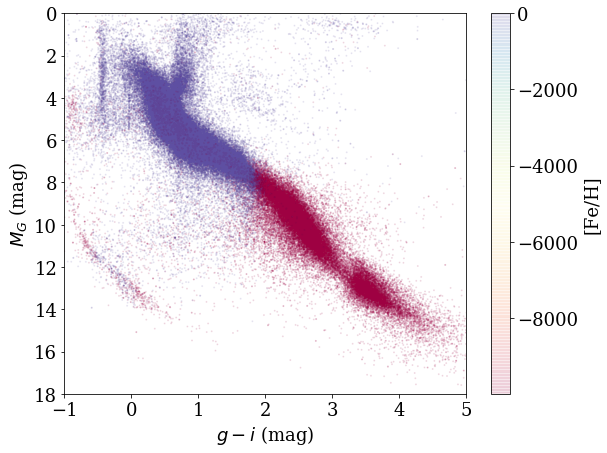

In [123]:
# plt.figure(figsize=(9,7))

# plt.scatter(data[u'GR'].values[ok]+data[u'RI'].values[ok], 
#             (data[u'phot_g_mean_mag'].values[ok] - 
#              5*np.log10(1000./data[u'parallax'].values[ok])+5),
#             s=1, alpha=0.1, c=data[u'FEH_ADOP'].values[ok], cmap=plt.cm.Spectral)
# cb = plt.colorbar()
# plt.ylim(18,0)
# plt.xlim(-1,5)
# plt.xlabel('$g-i$ (mag)')
# plt.ylabel(r'$M_G$ (mag)')
# cb.set_label('[Fe/H]')

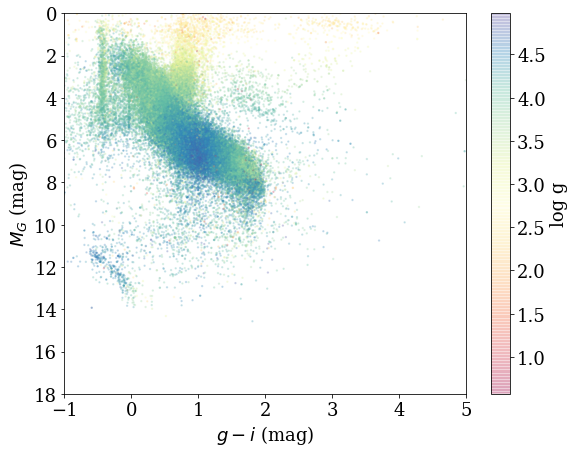

In [138]:
# fok = np.where((data[u'FEH_ADOP'].values[ok] > -6))

# M_G = (data[u'phot_g_mean_mag'].values[ok] - 
#        5*np.log10(1000./data[u'parallax'].values[ok])+5)

# plt.figure(figsize=(9,7))

# plt.scatter(data[u'GR'].values[ok][fok]+data[u'RI'].values[ok][fok], 
#             M_G[fok],
#             s=2, alpha=0.2, c=data[u'LOGG_ADOP'].values[ok][fok], cmap=plt.cm.Spectral)

# cb = plt.colorbar()
# plt.ylim(18,0)
# plt.xlim(-1,5)
# plt.xlabel('$g-i$ (mag)')
# plt.ylabel(r'$M_G$ (mag)')
# cb.set_label('log g')

In [252]:
# gok = np.where((data[u'FEH_ADOP'].values[ok] > -6) & 
#                (M_G > 4) & (M_G < 9) & 
#                np.isfinite(data[u'a_g_val'].values[ok]) & 
#                (data[u'a_g_val'].values[ok] < 0.5))


/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in less


In [440]:
# plt.figure(figsize=(9,7))
# plt.scatter(data[u'GR'].values[ok][gok] + data[u'RI'].values[ok][gok], 
#             data[u'UG'].values[ok][gok],
#             c=data[u'FEH_ADOP'].values[ok][gok], s=2, alpha=0.5, cmap=plt.cm.coolwarm)

# cb = plt.colorbar()
# cb.set_label('[Fe/H]')
# cb.set_clim((-2,1))
# plt.xlim(0,2)
# plt.ylim(0.5,3)
# plt.ylabel('$u-g$')
# plt.xlabel('$g-i$')

In [441]:
# plt.figure(figsize=(9,7))
# plt.scatter(data[u'phot_g_mean_mag'].values[ok][gok] - data[u'Jmag'].values[ok][gok], 
#             data[u'UG'].values[ok][gok],
#             c=data[u'FEH_ADOP'].values[ok][gok], s=2, alpha=0.5, cmap=plt.cm.coolwarm)

# cb = plt.colorbar()
# cb.set_label('[Fe/H]')
# cb.set_clim((-2,1))
# plt.xlim(0,3)
# plt.ylim(0.5,3)
# plt.ylabel('$u-g$')
# plt.xlabel('$G-J$')

### APOGEE next

In [170]:
apog = Table.read('/Users/james/Desktop/gaia_tmp/allStar-l31c.2.fits', format='fits')

In [369]:
# apog.colnames

In [171]:
xyokA = np.where((apog['RA'] >= 0) & (apog['RA'] <= 360) & 
                 (apog['DEC'] >= -90) & (apog['DEC'] <= 90))[0]
# df_outA = pd.DataFrame(data={'ra':apog['RA'][xyokA], 'dec':apog['DEC'][xyokA]})
# df_outA.to_csv('apog_toX.csv')

In [174]:
Agaia = pd.read_csv('/Users/james/Desktop/gaia_tmp/Agaia.csv')
Awise = pd.read_csv('/Users/james/Desktop/gaia_tmp/Awise.csv')

In [287]:
# need to select out columns i want, b/c multi-D cols messing .to_pandas up...
# can fix later...

dfA = apog[xyokA]['J','J_ERR','H', 'H_ERR', 'K', 'K_ERR', 'VSINI',
                  'RA', 'DEC', 'GLON', 'GLAT', 'TEFF', 'LOGG', 'FE_H'].to_pandas()


In [288]:
tmp_dataA = pd.merge(Agaia, Awise, left_on=u'id', right_on=u'id')
Adata = pd.merge(dfA, tmp_dataA, how='inner', left_on=np.arange(len(dfA)), right_on=u'id')

In [277]:
# Adata.columns

In [290]:
Aok = np.where((Adata[u'FE_H'] > -6))

M_GA = (Adata[u'phot_g_mean_mag'].values[Aok] - 
        5*np.log10(1000./Adata[u'parallax'].values[Aok])+5)

/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in divide
/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log10


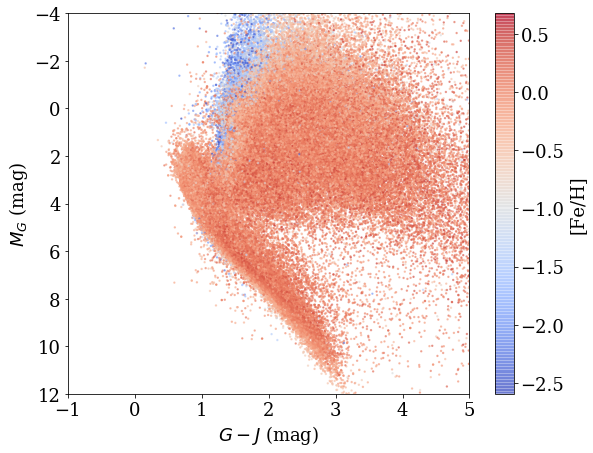

In [436]:
plt.figure(figsize=(9,7))

plt.scatter(Adata[u'phot_g_mean_mag'].values[Aok] - Adata[u'Jmag'].values[Aok], 
            M_GA,
            s=2, alpha=0.5, c=Adata[u'FE_H'].values[Aok], cmap=plt.cm.coolwarm)

cb = plt.colorbar()
plt.ylim(12,-4)
plt.xlim(-1,5)
plt.xlabel('$G-J$ (mag)')
plt.ylabel(r'$M_G$ (mag)')
cb.set_label('[Fe/H]')

Text(0,0.5,'$M_G$ (mag)')

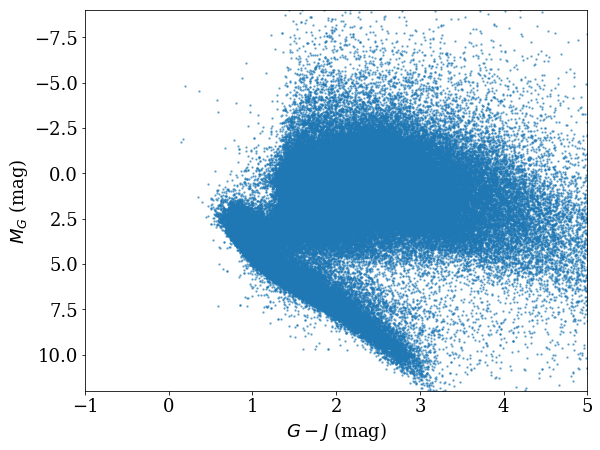

In [439]:
plt.figure(figsize=(9,7))

plt.scatter(Adata[u'phot_g_mean_mag'].values[Aok] - Adata[u'Jmag'].values[Aok], 
            M_GA,
            s=2, alpha=0.5)

plt.ylim(12,-9)
plt.xlim(-1,5)
plt.xlabel('$G-J$ (mag)')
plt.ylabel(r'$M_G$ (mag)')


uh oh.... no mid-M dwarfs in APOGEE.... oh well

Text(0.5,1,'APOGEE stars')

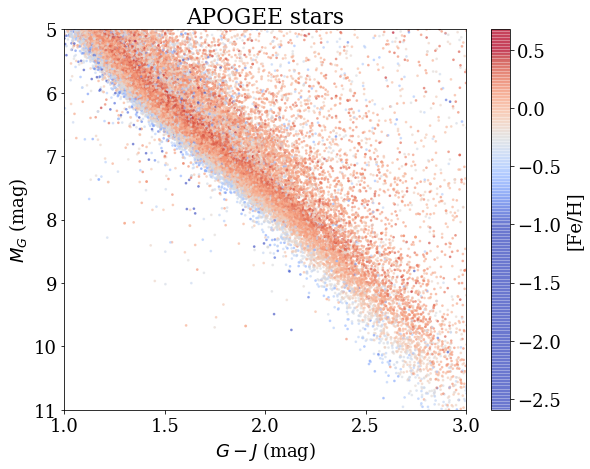

In [296]:
plt.figure(figsize=(9,7))

plt.scatter(Adata[u'phot_g_mean_mag'].values[Aok] - Adata[u'Jmag'].values[Aok], 
            M_GA,
            s=3, alpha=0.5, c=Adata[u'FE_H'].values[Aok], cmap=plt.cm.coolwarm)

cb = plt.colorbar()
cb.set_clim(-1,0.5)
plt.ylim(11,5)
plt.xlim(1,3)
plt.xlabel('$G - J$ (mag)')
plt.ylabel(r'$M_G$ (mag)')
cb.set_label('[Fe/H]')
plt.title('APOGEE stars')

Text(0,0.5,'$M_G$ (mag)')

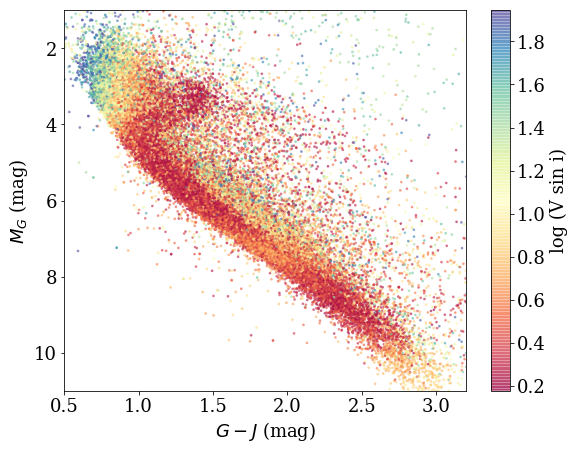

In [363]:
vok = np.where((Adata[u'VSINI'].values[Aok] > -10))
plt.figure(figsize=(9,7))

plt.scatter(Adata[u'phot_g_mean_mag'].values[Aok][vok] - Adata[u'Jmag'].values[Aok][vok], 
            M_GA[vok],
            s=3, alpha=0.5, c=np.log10(Adata[u'VSINI'].values[Aok][vok]), cmap=plt.cm.Spectral)

cb = plt.colorbar()
# cb.set_clim(0,10)
cb.set_label('log (V sin i)')
plt.ylim(11, 1)
plt.xlim(0.5, 3.2)
plt.xlabel('$G - J$ (mag)')
plt.ylabel(r'$M_G$ (mag)')


Text(0,0.5,'$M_G$ (mag)')

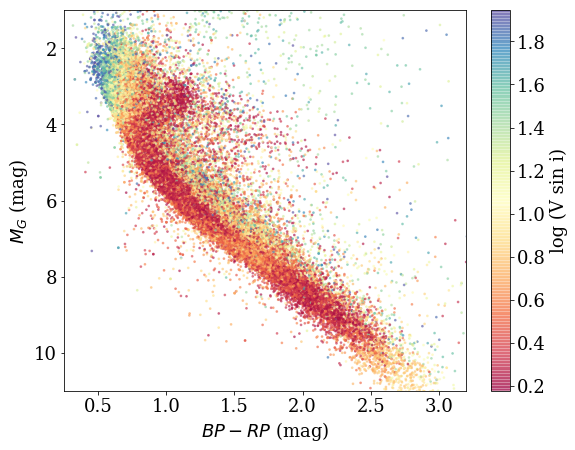

In [365]:
plt.figure(figsize=(9,7))

plt.scatter(Adata[u'phot_bp_mean_mag'].values[Aok][vok] - Adata[u'phot_rp_mean_mag'].values[Aok][vok], 
            M_GA[vok],
            s=3, alpha=0.5, c=np.log10(Adata[u'VSINI'].values[Aok][vok]), cmap=plt.cm.Spectral)

cb = plt.colorbar()
# cb.set_clim(0,10)
cb.set_label('log (V sin i)')
plt.ylim(11, 1)
plt.xlim(0.25, 3.2)
plt.xlabel('$BP - RP$ (mag)')
plt.ylabel(r'$M_G$ (mag)')



/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in greater_equal
  from ipykernel import kernelapp as app
/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()


Text(0,0.5,'$G-J$ (mag)')

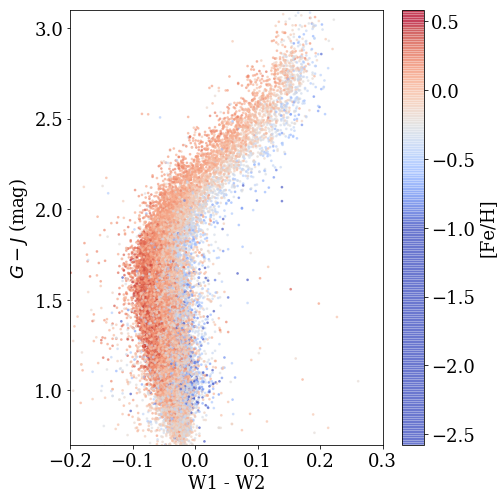

In [263]:
Bok = np.where((M_GA >= 3) & 
               np.isfinite(Adata[u'a_g_val'].values[Aok]) & 
               (Adata[u'a_g_val'].values[Aok] < 0.5))

plt.figure(figsize=(7,8))

plt.scatter(Adata[u'W1mag'].values[Aok][Bok] - Adata[u'W2mag'].values[Aok][Bok], 
            Adata[u'phot_g_mean_mag'].values[Aok][Bok] - Adata[u'Jmag'].values[Aok][Bok],
            c=Adata[u'FE_H'].values[Aok][Bok], s=3, alpha=0.5, cmap=plt.cm.coolwarm)

cb = plt.colorbar()
cb.set_label('[Fe/H]')
cb.set_clim(-1,0.5)
plt.xlim(-0.2,0.3)
plt.ylim(0.7, 3.1)
plt.xlabel('W1 - W2')
plt.ylabel('$G-J$ (mag)')

## Model
can we build a model of it? A goal for Thursday!

Text(0,0.5,'$G-J$ (mag)')

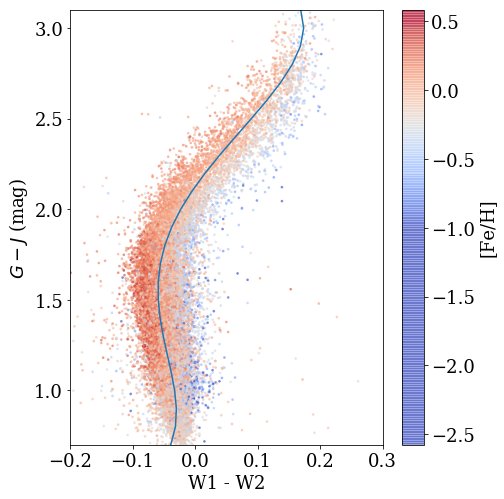

In [327]:
plt.figure(figsize=(7,8))

fitok = np.where((Adata[u'phot_g_mean_mag'].values[Aok][Bok] - Adata[u'Jmag'].values[Aok][Bok] < 3.3) & 
                 (Adata[u'phot_g_mean_mag'].values[Aok][Bok] - Adata[u'Jmag'].values[Aok][Bok] > 0))

plt.scatter(Adata[u'W1mag'].values[Aok][Bok] - Adata[u'W2mag'].values[Aok][Bok], 
            Adata[u'phot_g_mean_mag'].values[Aok][Bok] - Adata[u'Jmag'].values[Aok][Bok],
            c=Adata[u'FE_H'].values[Aok][Bok], s=3, alpha=0.5, cmap=plt.cm.coolwarm)

fit = np.polyfit((Adata[u'phot_g_mean_mag'].values[Aok][Bok][fitok] - 
                  Adata[u'Jmag'].values[Aok][Bok][fitok]), 
                 (Adata[u'W1mag'].values[Aok][Bok][fitok] - 
                  Adata[u'W2mag'].values[Aok][Bok][fitok]), 4)
plt.plot(np.polyval(fit,np.arange(0,3.2,0.1)), np.arange(0,3.2,0.1))

cb = plt.colorbar()
cb.set_label('[Fe/H]')
cb.set_clim(-1,0.5)
plt.xlim(-0.2,0.3)
plt.ylim(0.7, 3.1)
plt.xlabel('W1 - W2')
plt.ylabel('$G-J$ (mag)')

Text(0,0.5,'$G-J$ (mag)')

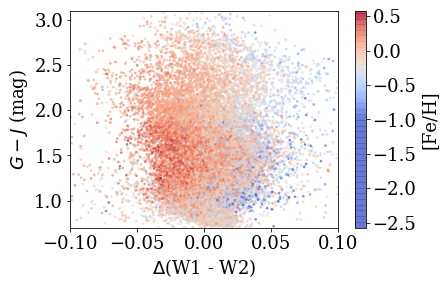

In [328]:
plt.scatter((Adata[u'W1mag'].values[Aok][Bok] - Adata[u'W2mag'].values[Aok][Bok] - 
             np.polyval(fit, Adata[u'phot_g_mean_mag'].values[Aok][Bok] - Adata[u'Jmag'].values[Aok][Bok])), 
            Adata[u'phot_g_mean_mag'].values[Aok][Bok] - Adata[u'Jmag'].values[Aok][Bok],
            c=Adata[u'FE_H'].values[Aok][Bok], s=3, alpha=0.5, cmap=plt.cm.coolwarm)

cb = plt.colorbar()
cb.set_label('[Fe/H]')
cb.set_clim(-1,0.5)
plt.xlim(-0.1,0.1)
plt.ylim(0.7, 3.1)
plt.xlabel(r'$\Delta$(W1 - W2)')
plt.ylabel('$G-J$ (mag)')

In [401]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [406]:
Mok = np.where((Adata[u'FE_H'].values[Aok][Bok] >= -1))
Xdata = np.array([Adata[u'W1mag'].values[Aok][Bok][Mok] - Adata[u'W2mag'].values[Aok][Bok][Mok],
                  Adata[u'phot_g_mean_mag'].values[Aok][Bok][Mok] - Adata[u'Jmag'].values[Aok][Bok][Mok],
                  M_GA[Bok][Mok]]).T
#             c=Adata[u'FE_H'].values[Aok][Bok]]
Xdata.shape
Ydata = Adata[u'FE_H'].values[Aok][Bok][Mok]

In [407]:
# our bad model
model = LinearRegression()
model.fit(Xdata, Ydata)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [408]:
newY = model.predict(Xdata)

(-1.0819262972727413, 0.6647018304720514)

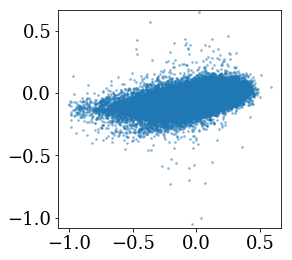

In [409]:
plt.figure(figsize=(4,4))
plt.scatter(Ydata, newY, s=3, alpha=0.4)
plt.ylim(plt.xlim())

(-1.0819262972727413, 0.6647018304720514)

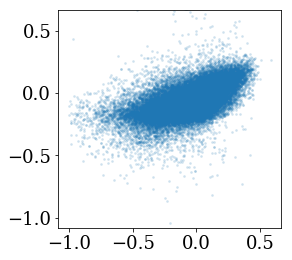

In [410]:
# our modestly less bad model
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(5), LinearRegression())

poly_model.fit(Xdata, Ydata)
newY = poly_model.predict(Xdata)

plt.figure(figsize=(4,4))
plt.scatter(Ydata, newY, s=3, alpha=0.14)
# plt.xlim(-.5,.5)
plt.ylim(plt.xlim())

(-1.0819262972727413, 0.6647018304720514)

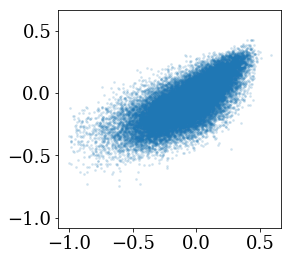

In [413]:
model = KNeighborsRegressor(n_neighbors=5)

model.fit(Xdata, Ydata)
newY = model.predict(Xdata)

plt.figure(figsize=(4,4))
plt.scatter(Ydata, newY, s=3, alpha=0.14)
# plt.xlim(-.5,.5)
plt.ylim(plt.xlim())

In [414]:
from sklearn.cross_validation import train_test_split

In [419]:
x_train, x_test, y_train, y_test = train_test_split(Xdata, Ydata)

(-1.0768670878067605, 0.5584584316864601)

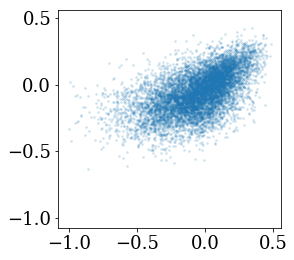

In [420]:
model = KNeighborsRegressor(n_neighbors=5)

model.fit(x_train, y_train)
newY = model.predict(x_test)

plt.figure(figsize=(4,4))
plt.scatter(y_test, newY, s=3, alpha=0.14)
# plt.xlim(-.5,.5)
plt.ylim(plt.xlim())

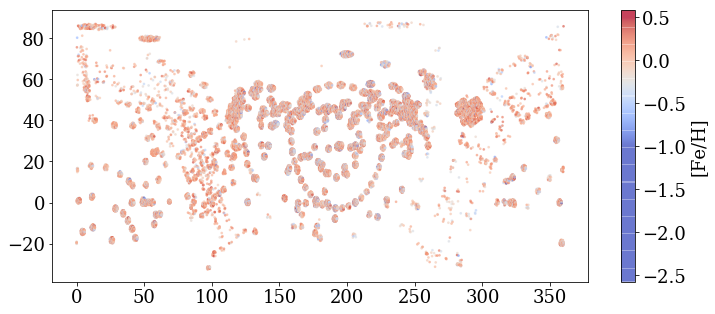

In [282]:
plt.figure(figsize=(12,5))

plt.scatter(Adata[u'RA'].values[Aok][Bok],
            Adata[u'DEC'].values[Aok][Bok],
            c=Adata[u'FE_H'].values[Aok][Bok], s=3, alpha=0.5, cmap=plt.cm.coolwarm)

cb = plt.colorbar()
cb.set_label('[Fe/H]')
cb.set_clim(-1,0.5)


In [432]:
# plt.scatter(Adata[u'W2mag'].values[Aok][Bok], Adata[u'e_W2mag'].values[Aok][Bok],
#             s=3, alpha=0.3)

In [329]:
nf = pd.read_csv('/Users/james/Desktop/gaia_tmp/gaia_apogee1.csv')

In [341]:
print(nf.shape)

(5182794, 65)


In [433]:
# nf.columns

/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app
/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app
/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in greater


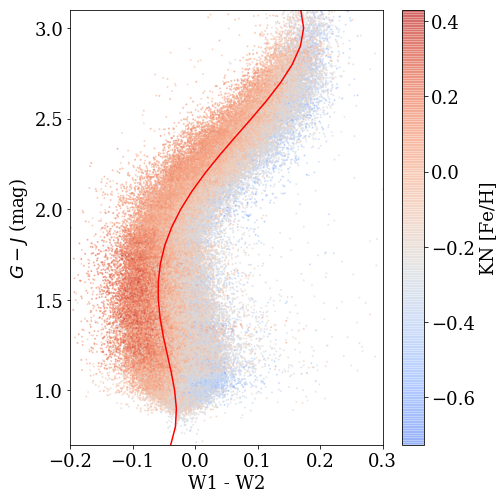

In [427]:
nM_G = (nf[u'phot_g_mean_mag'].values - 
       5*np.log10(1000./nf[u'parallax'].values)+5)

nok = np.where((nf[u'e_W2mag'] <= 0.05) & (nf[u'W2mag'] < 14) & 
               np.isfinite(nf[u'a_g_val']) & 
               (nM_G > 4) &
               np.isfinite(nM_G) & 
               np.isfinite(nf[u'W1mag']) & 
               np.isfinite(nf[u'W2mag']) & 
               np.isfinite(nf[u'Jmag']) & 
               (nf[u'a_g_val'] < 0.5) & 
               (nf[u'parallax_error']/nf[u'parallax'] < 0.1))[0]


X_NEW_DATA = np.array([nf[u'W1mag'].values[nok] - nf[u'W2mag'].values[nok],
                       nf[u'phot_g_mean_mag'].values[nok] - nf[u'Jmag'].values[nok], 
                       nM_G[nok]]).T
NEW_FE_H = model.predict(X_NEW_DATA)


plt.figure(figsize=(7,8))

plt.scatter(nf[u'W1mag'].values[nok] - nf[u'W2mag'].values[nok],
            nf[u'phot_g_mean_mag'].values[nok] - nf[u'Jmag'].values[nok],
            s=1, alpha=0.5, c=NEW_FE_H, cmap=plt.cm.coolwarm)

plt.plot(np.polyval(fit,np.arange(0,3.2,0.1)), np.arange(0,3.2,0.1), c='r')

plt.xlim(-0.2,0.3)
plt.ylim(0.7, 3.1)
plt.xlabel('W1 - W2')
plt.ylabel('$G-J$ (mag)')

cb = plt.colorbar()
cb.set_label('KN [Fe/H]')
cb.set_clim(-1,0.5)

In [431]:
print(NEW_FE_H.shape)

(199363,)


Text(0,0.5,'$M_G$ (mag)')

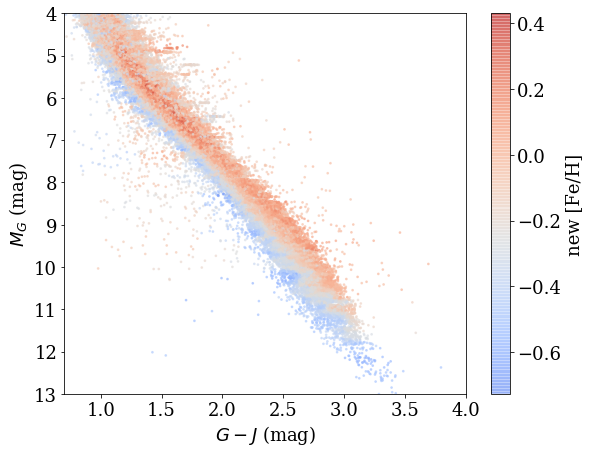

In [429]:
plt.figure(figsize=(9,7))

plt.scatter(nf[u'phot_g_mean_mag'].values[nok] - nf[u'Jmag'].values[nok],
            nM_G[nok],
            s=3, alpha=0.5, cmap = plt.cm.coolwarm,
            c = NEW_FE_H)

cb = plt.colorbar()
cb.set_label('new [Fe/H]')
cb.set_clim(-1,0.5)

plt.ylim(13,4)
plt.xlim(.7,4)
plt.xlabel('$G-J$ (mag)')
plt.ylabel(r'$M_G$ (mag)')


In [434]:
-2.5*np.log10(1e5)

-12.5